# Problem 2 — Percent change (1994–1998 → 2007–2008) for Men and Women

The first code cell below documents the **preprocessing steps** used to read and tidy the FAH data.

In [ ]:

# --- Preprocessing utilities (visible) ---
import re, numpy as np, pandas as pd

PERIOD_LABELS = ["1994-1998","2003-2004","2005-2006","2007-2008"]
FRUITS = ["Apples as fruit","Bananas","Berries","Grapes","Melons","Oranges, Total","Other citrus fruit","Stone fruit","Tropical fruit"]
DAIRY  = ["Fluid milk total","Butter","Cheese","Yogurt","Dairy, Other"]

def detect_gender_cols(df: pd.DataFrame):
    men_idx = women_idx = header_row = None
    for r in range(0, min(160, len(df)-3)):
        row = df.iloc[r].astype(str).tolist()
        if any("Age and gender" in str(x) for x in row):
            labels = df.iloc[r+1].astype(str).tolist()
            means  = df.iloc[r+2].astype(str).tolist()
            men_c = [i for i,v in enumerate(labels) if str(v).strip().lower()=="men"]
            wom_c = [i for i,v in enumerate(labels) if str(v).strip().lower()=="women"]
            if men_c and str(means[men_c[0]]).strip().lower()=="mean": men_idx = men_c[0]
            if wom_c and str(means[wom_c[0]]).strip().lower()=="mean": women_idx = wom_c[0]
            header_row = r+3; break
    if men_idx is None: men_idx=7
    if women_idx is None: women_idx=10
    if header_row is None: header_row=76
    return header_row, men_idx, women_idx


In [1]:
tidy.head(20)

,period,product,gender,mean,group
0,1994-1998,Apples as fruit,Men,89.18,Fruit
1,1994-1998,Apples as fruit,Women,90.42,Fruit
2,1994-1998,Bananas,Men,95.42,Fruit
3,1994-1998,Bananas,Women,94.18,Fruit
4,1994-1998,Berries,Men,84.21,Fruit
5,1994-1998,Berries,Women,81.73,Fruit
6,1994-1998,Grapes,Men,88.79,Fruit
7,1994-1998,Grapes,Women,88.13,Fruit
8,1994-1998,Melons,Men,80.74,Fruit
9,1994-1998,Melons,Women,84.96,Fruit


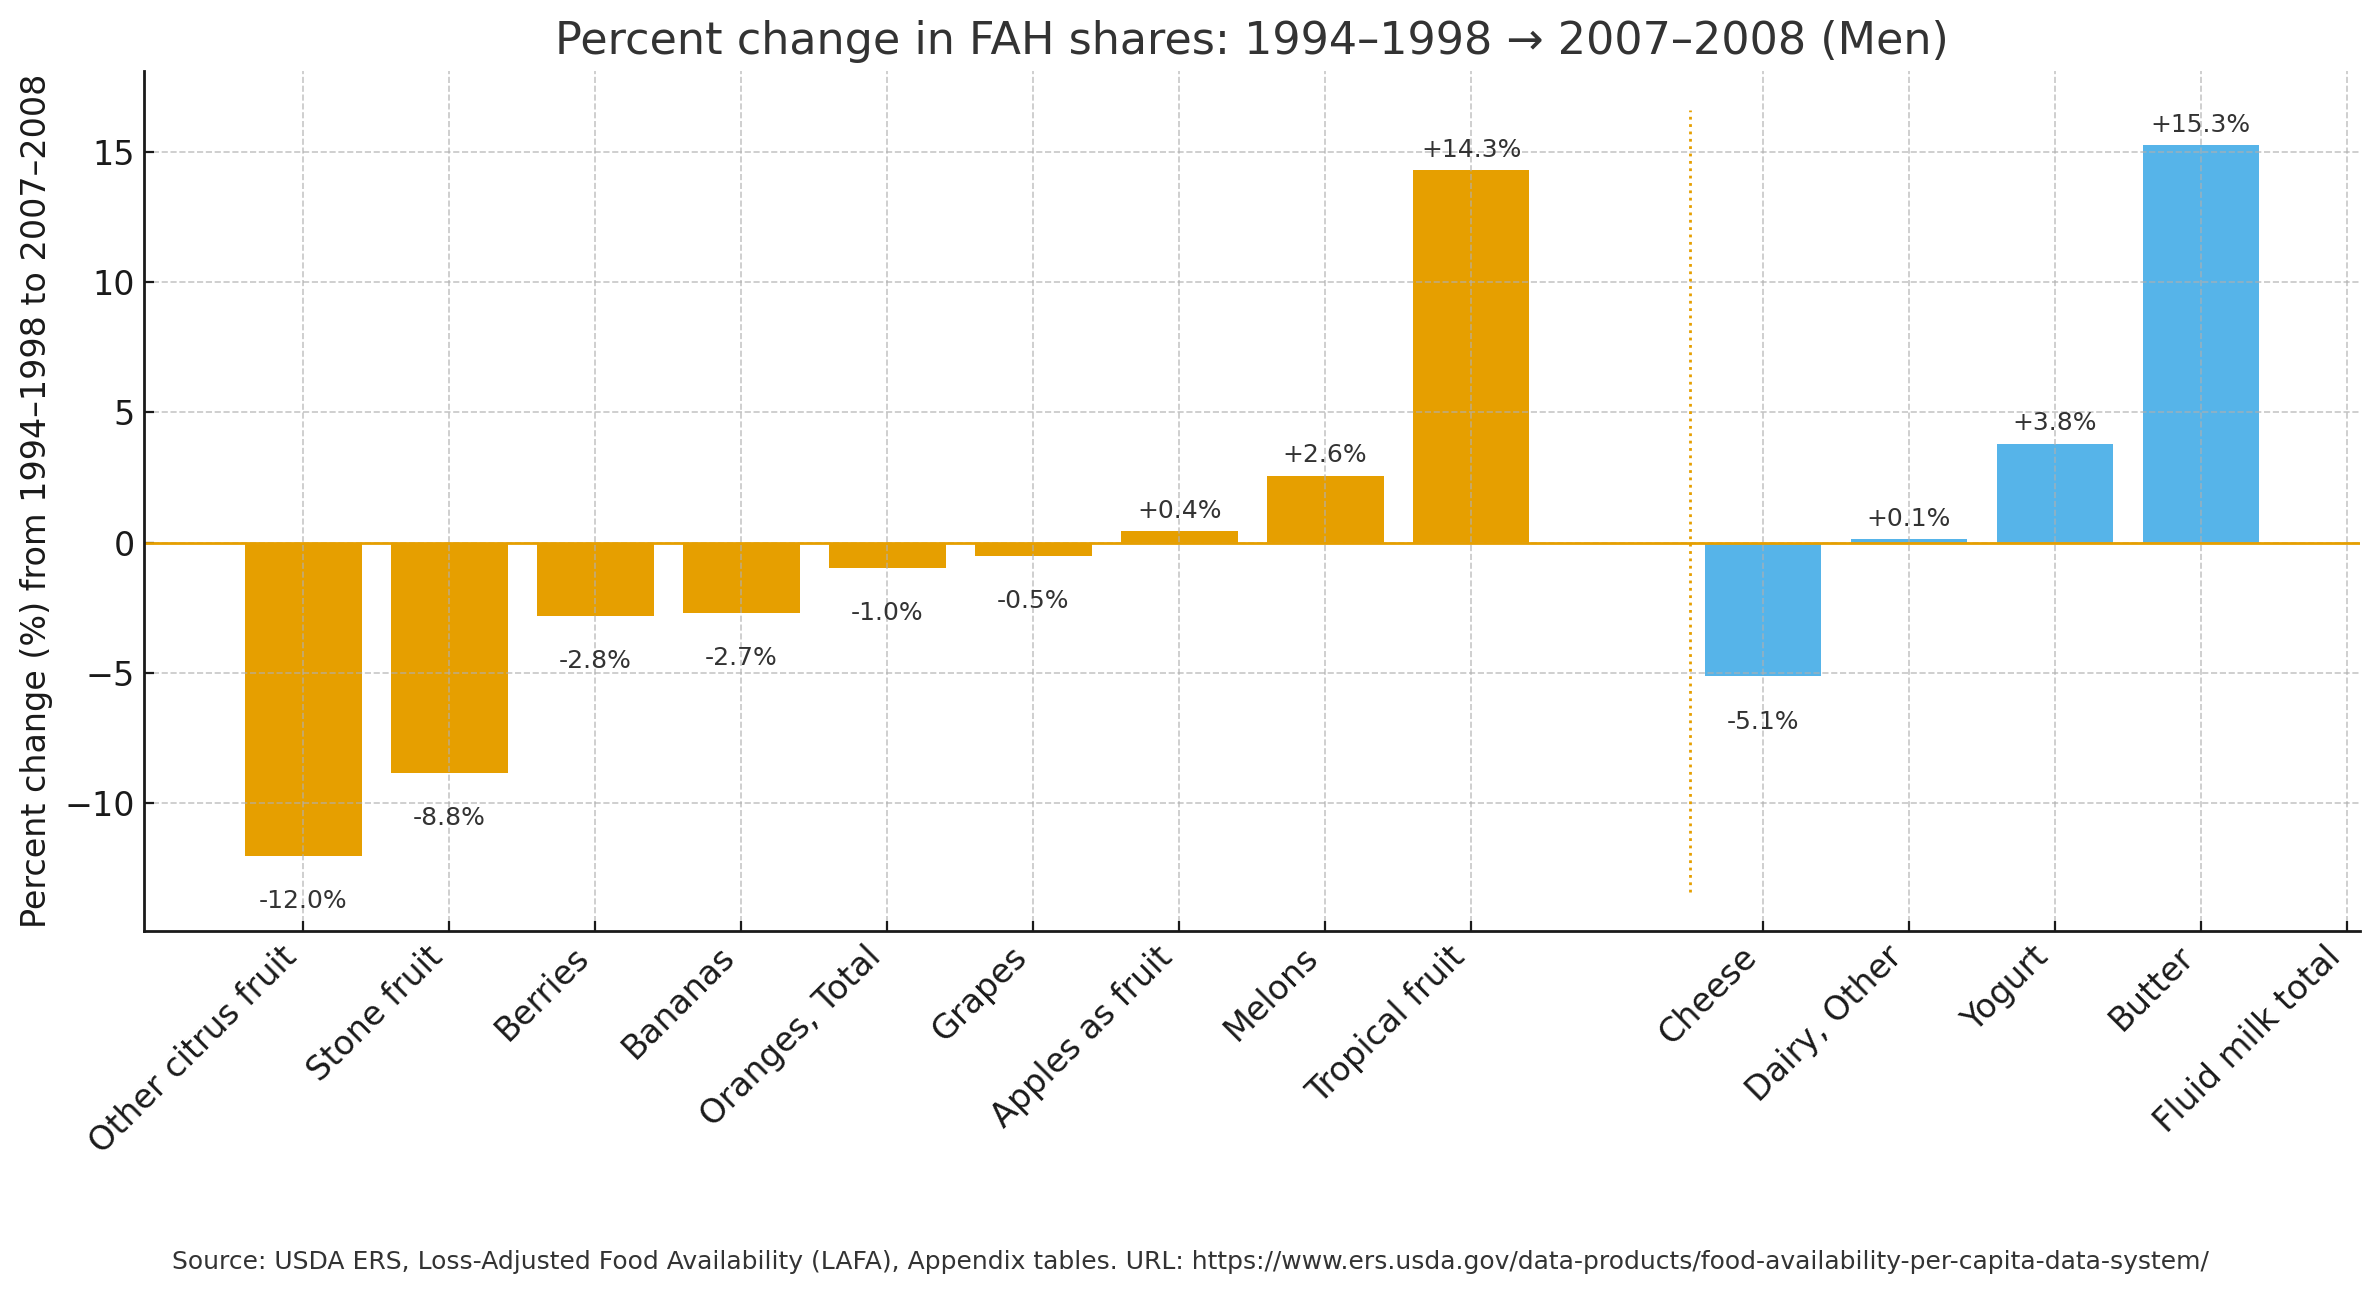

In [2]:
# Men — percent change chart

*Caption:* For Men, within each category products are sorted by percent change from 1994–1998 to 2007–2008. Largest decrease: **Other citrus fruit** (-12.0 pp); Largest increase: **Butter** (+15.3 pp).

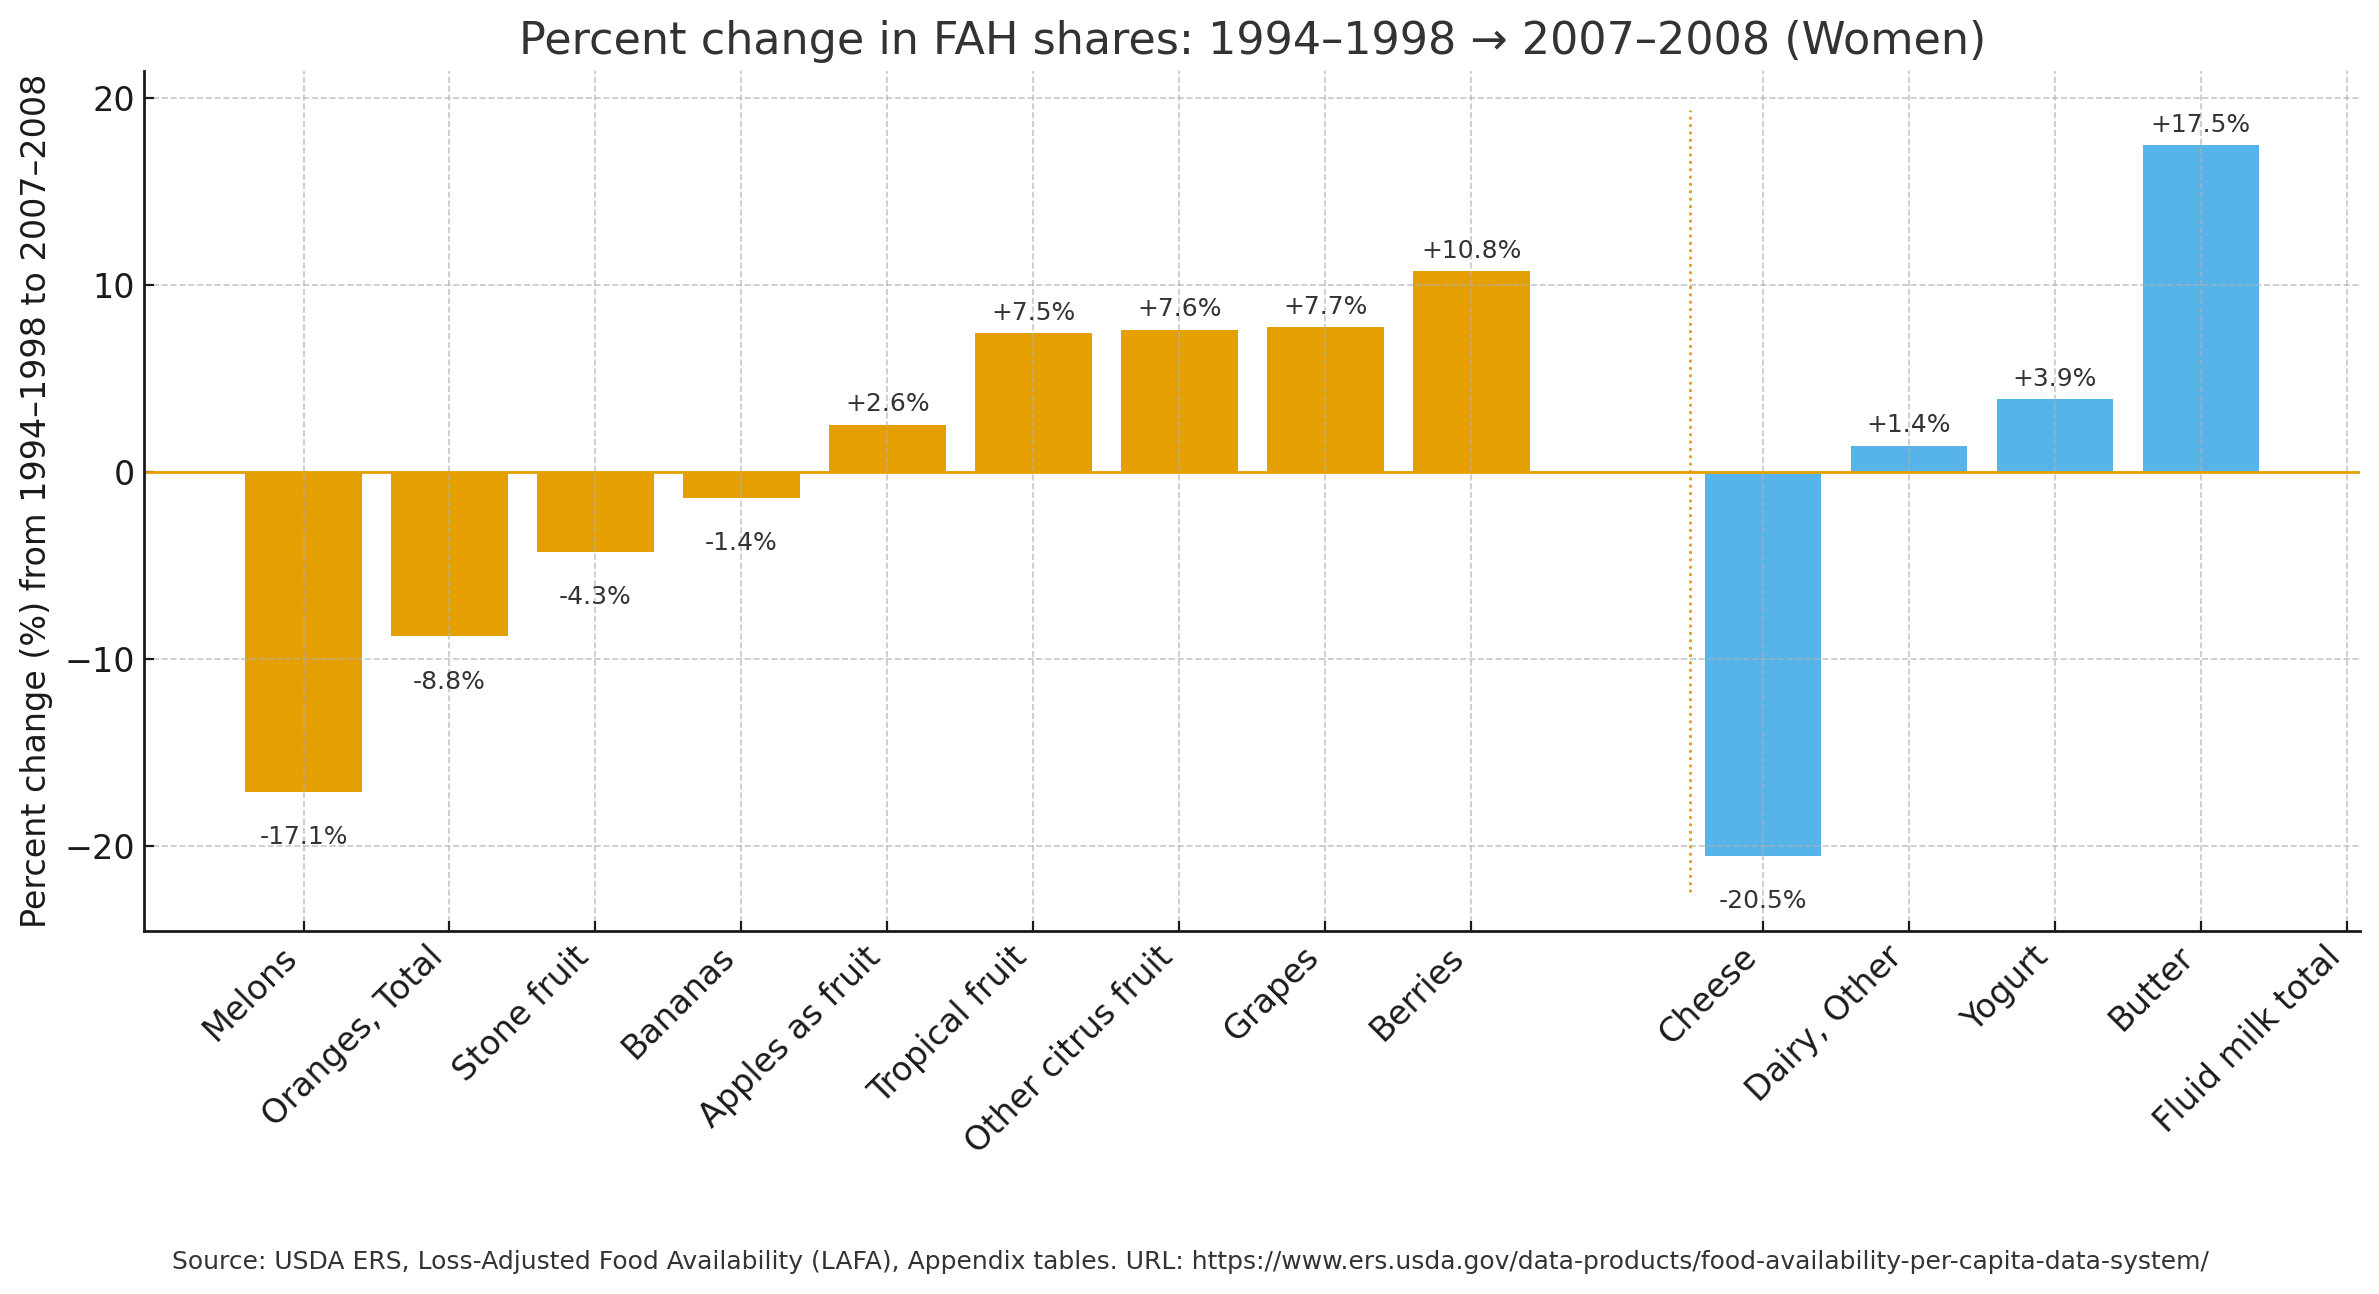

In [3]:
# Women — percent change chart

*Caption:* For Women, within each category products are sorted by percent change from 1994–1998 to 2007–2008. Largest decrease: **Cheese** (-20.5 pp); Largest increase: **Butter** (+17.5 pp).